In [ ]:
!pip install biosignalsnotebooks
!apt-get install libmagic-dev
!pip install python-magic
import magic

## Libraries and Function Definitions

In [81]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import biosignalsnotebooks as bsnb
import pandas as pd
import h5py

from scipy.integrate import cumtrapz
from scipy.signal import welch

from google.colab import drive 
drive.mount('/content/gdrive')

#Function demonstrating data use without bsnb
#col[-1] gives the last channel
def pltEMG_mV(path, fname, channels):
  x=np.loadtxt(path + fname)
  i = 1
  while(i <= channels):
    plt.figure()
    plt.plot((x[0:23000,-i]/(2**10)-0.5)*3.3/1009*1000,'k')
    plt.ylim([-1.63,1.63])
    plt.ylabel('mV')
    plt.xlabel('t (ms)')
    plt.title(fname + ':EMG_Channel_' + str(channels - i + 1))



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Hierarchical Data Formatting and Header Parsing (.h5)

### HDF5 Formatting and Data Attributes/Metadata

In [83]:
fdir = '/content/gdrive/MyDrive/__SPRING 2022/SNOD/SilentSpeechDAS/fEMGData/'
fname = 'yn_test_christian_3_9_22_I'

fpath_h5 = fdir + fname + '.h5'

h5_object = h5py.File(fpath_h5)
print("HDF5 File: " + str(h5_object))

mac_addresses = list(h5_object.keys())
deviceMAC = mac_addresses[0]
print ("First hierarchy level (MAC address): " + str(deviceMAC))

h5_group = h5_object.get(deviceMAC)
print ("Second hierarchy level (Groups): " + str(list(h5_group)))
print ("\tuse 'raw' subgroup to access signals")

print ("\nMetadata Attributes of Group: \n\t" + str("\n\t".join(list(h5_group.attrs.keys()))))

sampling_rate = h5_group.attrs.get("sampling rate")
print ("\nSampling Rate: " + str(sampling_rate))

h5_sub_group = h5_group.get("raw")
print("\nThird hierarchy level (raw EMG data): " + str(list(h5_sub_group)))

h5_data = h5_sub_group.get("channel_2")
print("Access required channel: " + str(h5_data))


HDF5 File: <HDF5 file "yn_test_christian_3_9_22_I.h5" (mode r)>
First hierarchy level (MAC address): 20:19:07:00:80:D4
Second hierarchy level (Groups): ['digital', 'events', 'plugin', 'raw', 'support']
	use 'raw' subgroup to access signals

Metadata Attributes of Group: 
	channels
	comments
	date
	device
	device connection
	device name
	digital IO
	duration
	firmware version
	keywords
	macaddress
	mode
	nsamples
	resolution
	sampling rate
	sync interval
	time

Sampling Rate: 1000

Third hierarchy level (raw EMG data): ['channel_1', 'nSeq']
Access required channel: None


### BSNB Header Parsing and Plotting

In [78]:
data, header = bsnb.load(fpath_h5, get_header=True)
#get information which is stored inside variables
ch = "CH1" # Channel
sr = header["sampling rate"] 
resolution = header["resolution"][0] # Resolution (number of available bits)
device = header["device"]

vcc = 3300 #mV
gain  = 1009

#RAW DATA
signal = data[ch]

# Signal Sample Conversion Formula
signal_mv = (((np.array(signal) / 2**resolution) - 0.5) * vcc) / gain # Conversion to mV
time = bsnb.generate_time(signal, sr)

# Signal 

bsnb.plot([time], [signal_mv], x_axis_label="Time (s)", y_axis_label="Electric Tension (mV)")
print("Raw ADC Value: " + str(signal))
print("mV Value: " + str(signal_mv))

Raw ADC Value: [501 508 506 ... 499 496 499]
mV Value: [100.77428147 102.20515362 101.796333   ... 100.36546085  99.75222993
 100.36546085]


# Appendix

### Transfer Function

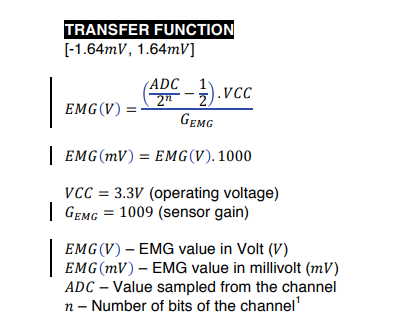

In [ ]:
signal_mv = (((np.array(signal) / 2**resolution) - 0.5) * vcc) / gain # Conversion to mV
time = bsnb.generate_time(signal, sr)